# Explore Dividends
This is a quick example notebook of how to get a look and feel for the dividend dataset. It was greatly inspired by Samuel's [exploratory notebook](https://www.kaggle.com/samlac79/beer-recipe-exploratory-analysis) which I really liked.    
Ask any questions in the comments below or on twitter [@jonnylangefeld](https://twitter.com/jonnylangefeld).

These are the libraries we are going to use:

In [55]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
pd.set_option('display.max_columns',None) #To see all the columns since there are a lot of them

### Import the Data
Let's import the data and have a quick look at a few rows, that are mostly filled. `simple_name`and `div_growth` are often `NA`, so I selected some rows that are even filled for these fields (Don't worry, `div_growth` is empty a lot of times, but we have an alternative, I'll get to that in a second).    
I use the pickle file, as most of the data has already been classified in the DataFrame stored as a pickle.

In [6]:
instruments = pd.read_pickle('../input/instruments.p')

In [7]:
instruments[instruments.simple_name.notna() & instruments.div_growth.notna()].head()

,symbol,name,simple_name,ceo,description,id,instrument,instrument_id,bloomberg_unique,fundamentals,splits,quote,url,country,state,headquarters_state,headquarters_city,market,exchange,sector,industry,type,tradability,tradeable,price,open,high,low,high_52_weeks,low_52_weeks,percent_off_52_week_high,volume,average_volume,average_volume_2_weeks,dividend_yield,div_yield,div_growth,annual_payout,payout_ratio,num_employees,year_founded,shares_outstanding,market_cap,num_buy_ratings,num_hold_ratings,num_sell_ratings,percent_buy_ratings,percent_sell_ratings,num_open_positions,day_trade_ratio,maintenance_ratio,margin_initial_ratio,pe_ratio,min_tick_size,list_date,recent_pay_date,news,recent_payment,ratings,payout_history
50,STM,STMicroelectronics N.V.,Stmicroelectronics,Carlo Bozotti,"STMicroelectronics NV designs, develops, manuf...",67d7bb04-8c2e-4338-b72a-18857809ec8d,https://api.robinhood.com/instruments/67d7bb04...,67d7bb04-8c2e-4338-b72a-18857809ec8d,EQ0015391600001003,https://api.robinhood.com/fundamentals/STM/,https://api.robinhood.com/instruments/67d7bb04...,https://api.robinhood.com/quotes/STM/,https://api.robinhood.com/instruments/67d7bb04...,CH,active,Geneve (Geneva),Plan-Les-Ouates,https://api.robinhood.com/markets/XNYS/,NYSE,Electronic Technology,Semiconductor - Broad Line,nyrs,tradable,True,20.96,21.6500,21.74,20.89,25.3000,14.0700,-17.15,1827183.0,3.869267e+06,2478449.0,0.9341,0.97,1.0,0.20,15.2,45468.0,1987.0,896590286.0,1.927669e+10,12.0,10.0,4.0,0.461538,0.153846,5562,0.25,0.25,0.50,22.3490,NaN,1994-12-07,2018-03-27,"[{'api_source': 'yahoo_finance', 'author': '',...",-28 days,"[{'type': 'buy', 'text': 'Chipmakers with heav...",Payout Amount Declared Date Ex-Dividend Da...
70,HCC,"Warrior Met Coal, Inc.",Warrior Met Coal,"Walter J. Scheller, III","Warrior Met Coal, Inc engages in the productio...",2558891e-79ea-4514-ad57-5ead789731cd,https://api.robinhood.com/instruments/2558891e...,2558891e-79ea-4514-ad57-5ead789731cd,EQ0000000055919493,https://api.robinhood.com/fundamentals/HCC/,https://api.robinhood.com/instruments/2558891e...,https://api.robinhood.com/quotes/HCC/,https://api.robinhood.com/instruments/2558891e...,US,active,Alabama,Brookwood,https://api.robinhood.com/markets/XNYS/,NYSE,Energy Minerals,Property & Casualty Insurance,stock,tradable,True,23.80,24.1100,24.21,23.33,26.4353,7.3997,-29.42,292529.0,7.106898e+05,1410526.5,0.5964,0.84,11.0,0.20,2.9,1354.0,2015.0,53284470.0,1.272433e+09,4.0,6.0,0.0,0.400000,0.000000,475,0.25,0.60,0.68,2.7604,NaN,2017-04-12,2018-04-20,[],-4 days,[],Payout Amount Declared Date Ex-Dividend Da...
100,LLL,"L3 Technologies, Inc.",L3 Technologies,Chris Kubasik,"L3 Technologies, Inc. provides communication a...",9efb71ab-9d73-4280-8516-fd32b0a96ddf,https://api.robinhood.com/instruments/9efb71ab...,9efb71ab-9d73-4280-8516-fd32b0a96ddf,EQ0038172600001000,https://api.robinhood.com/fundamentals/LLL/,https://api.robinhood.com/instruments/9efb71ab...,https://api.robinhood.com/quotes/LLL/,https://api.robinhood.com/instruments/9efb71ab...,US,active,New York,New York,https://api.robinhood.com/markets/XNYS/,NYSE,Electronic Technology,Security & Protection Services,stock,tradable,True,214.97,215.8685,216.04,213.46,218.7050,159.4300,-1.71,101196.0,5.799515e+05,504885.3,1.5163,1.49,14.0,3.20,33.5,31000.0,1997.0,77876687.0,1.675050e+10,14.0,5.0,0.0,0.736842,0.000000,429,0.25,0.25,0.50,25.2754,NaN,2017-01-03,2018-03-15,[],-40 days,"[{'type': 'sell', 'text': 'The U.S. defense bu...",Payout Amount Declared Date Ex-Dividend Da...
118,ARNC,Arconic Inc,Arconic,"Charles P. Blankenship, Jr.","Arconic, Inc. engages in the manufacturing and...",a464f25c-ce04-4059-af60-addb0a5b15a3,https://api.robinhood.com/instruments/a464f25c...,a464f25c-ce04-4059-af60-addb0a5b15a3,EQ0000000052124736,https://api.robinhood.com/fundamentals/ARNC/,https://api.robinhood.com/instruments/a464f25c...,https://api.robinhood.com/quotes/ARNC/,https://api.robinhood.com/instruments/a464f25c...,US,active,New York,New York,https://api.robinh

Let's see some general information about the dataset.

In [8]:
print(instruments.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3651 entries, 0 to 3650
Columns: 60 entries, symbol to payout_history
dtypes: category(11), datetime64[ns](2), float64(29), int64(1), object(16), timedelta64[ns](1)
memory usage: 1.5+ MB
None


We have 3651 rows and 60 columns. It is a quite small dataset only using 1.5 MB of memory.

Next thing we are interested in is how many missing values do we have. Samuel [used](https://www.kaggle.com/samlac79/beer-recipe-exploratory-analysis) the missingno library for that, which I found quite helpful. I sampled 500 rows and orderd by completenes:

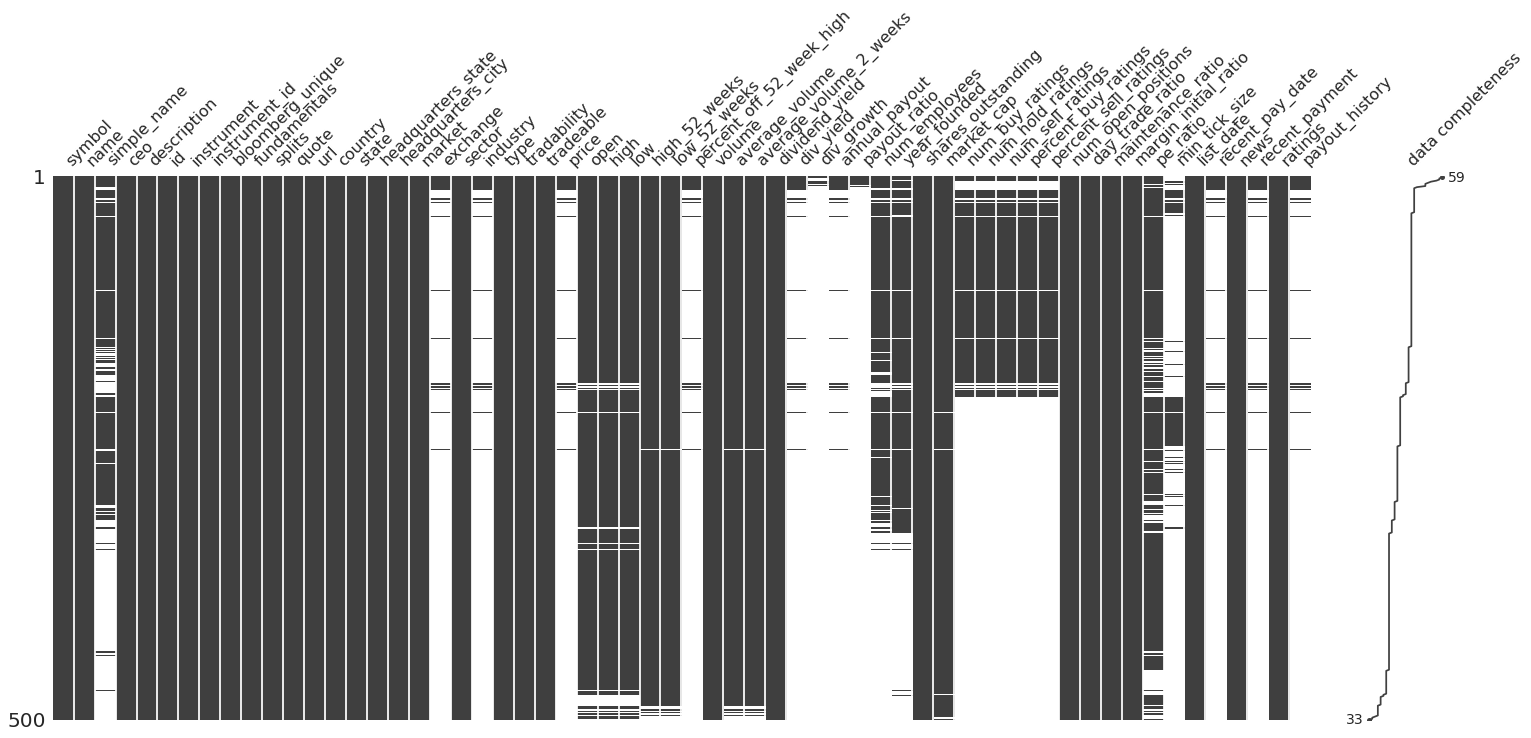

In [9]:
%matplotlib inline
msno.matrix(instruments.sample(500), labels=True, sort='descending')

Turns out that we have quite some columns that aren't filled fully. That is pretty easy to explain if we look [at this notebook](https://github.com/jonnylangefeld/dividend-data-download/blob/master/download-dividend-data.ipynb), that shows how the data has been gathered.    
It looks like that the data set on dividend.com is way smaller than the one on robinhood.com. In fact, only 5% of stocks that I found on robinhood, I could also find on dividend.com. So pretty much all the columns that come from dividend.com aren't filled very well. But hey, it's better than nothing!   

As [the table in this repository](https://github.com/jonnylangefeld/dividend-data-download) shows, `dividend_yield`comes from robinhood.com and `div_yield` comes from dividend.com. Hence the first one is filled fully (because the data is selected for only dividend paying assets)

Anyway, let's have a look at all categorial columns:

In [14]:
category_cols =  list(instruments.select_dtypes(include='category').columns)
category_cols

['country',
 'state',
 'headquarters_state',
 'headquarters_city',
 'market',
 'exchange',
 'sector',
 'industry',
 'type',
 'tradability',
 'tradeable']

We will just loop over all categorial columns and print a countplot with the top 30 categories (some of the charts looked really weired when I included all available categories). This gives us a feeling of the distribution of the dataset. 

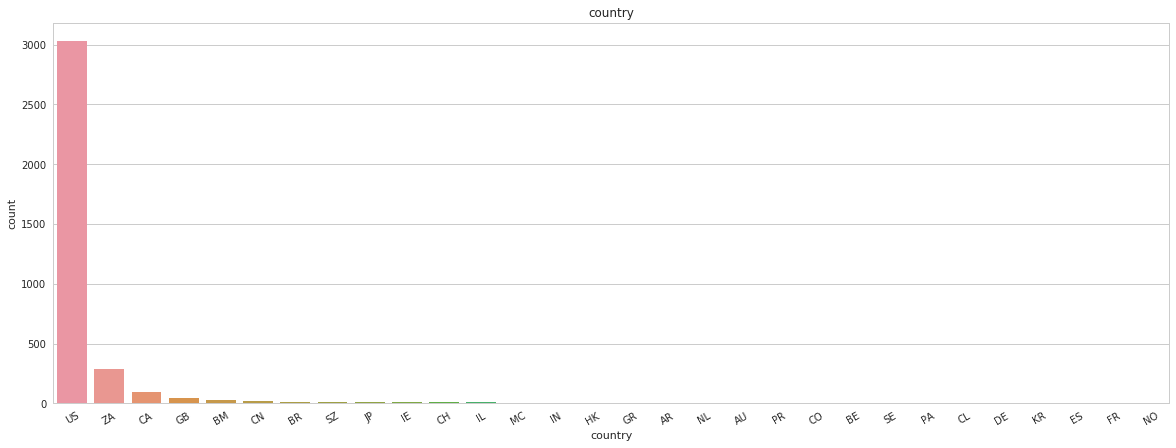

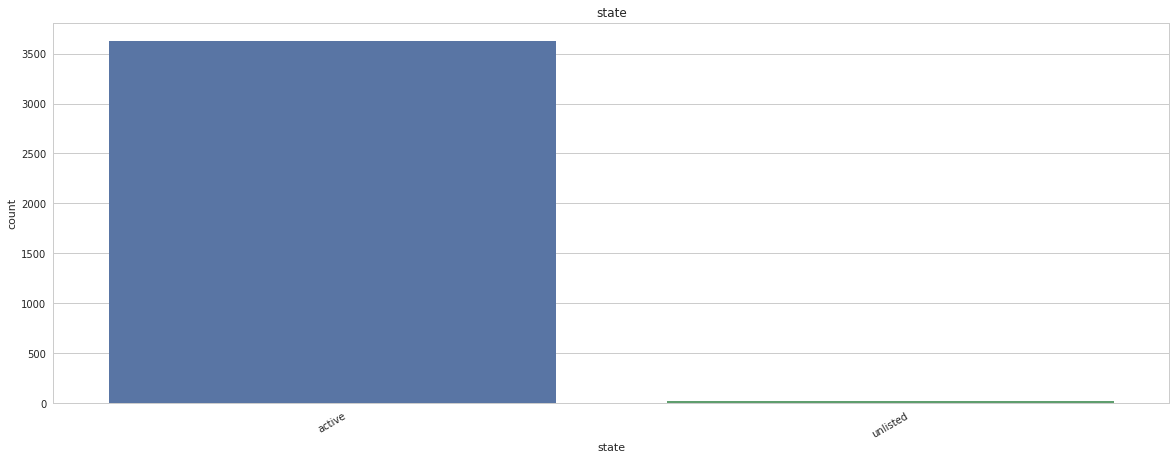

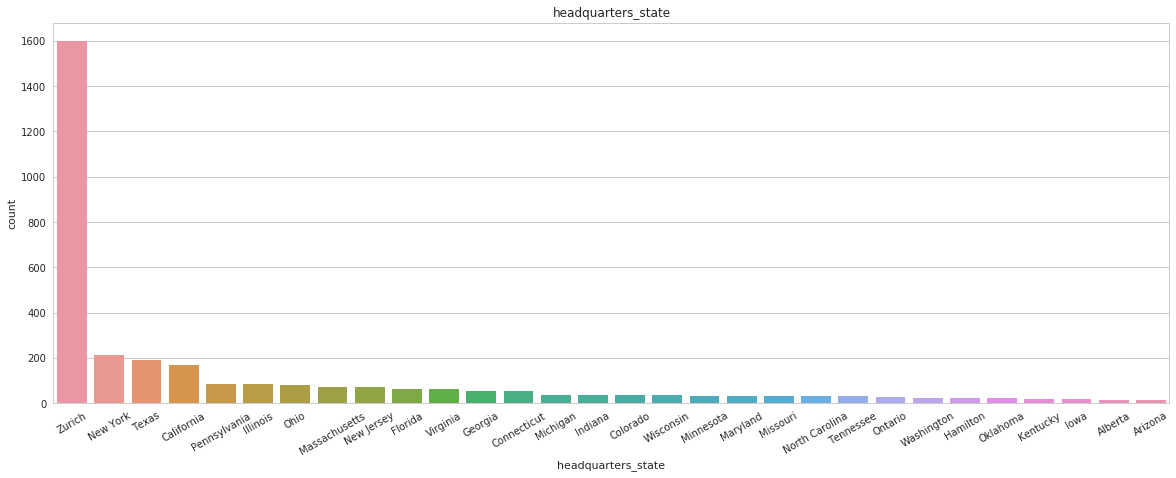

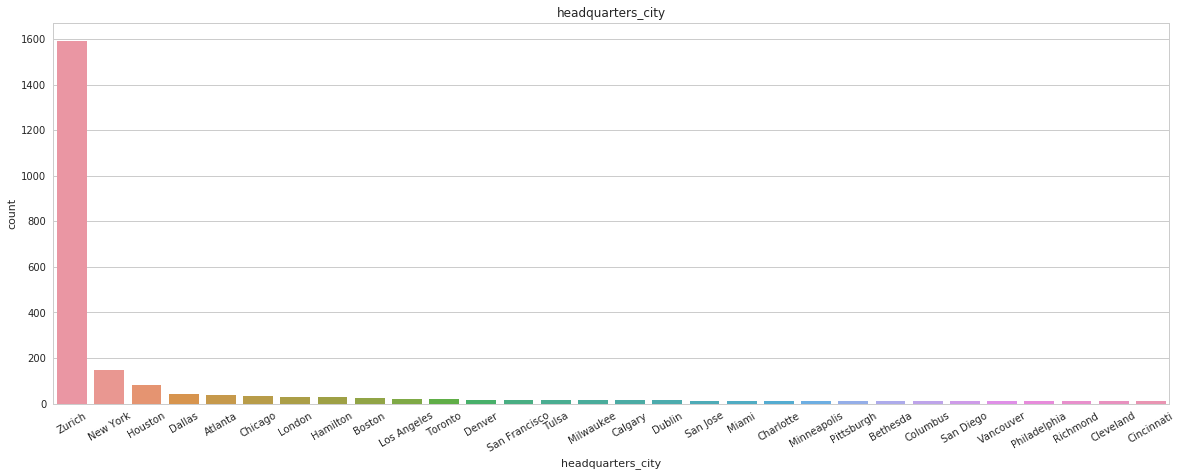

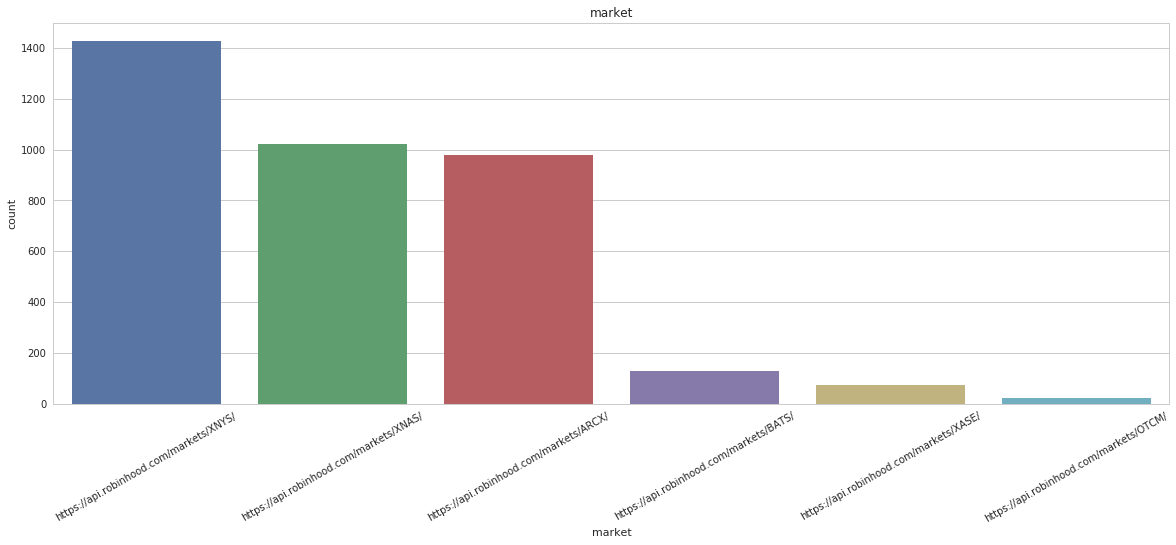

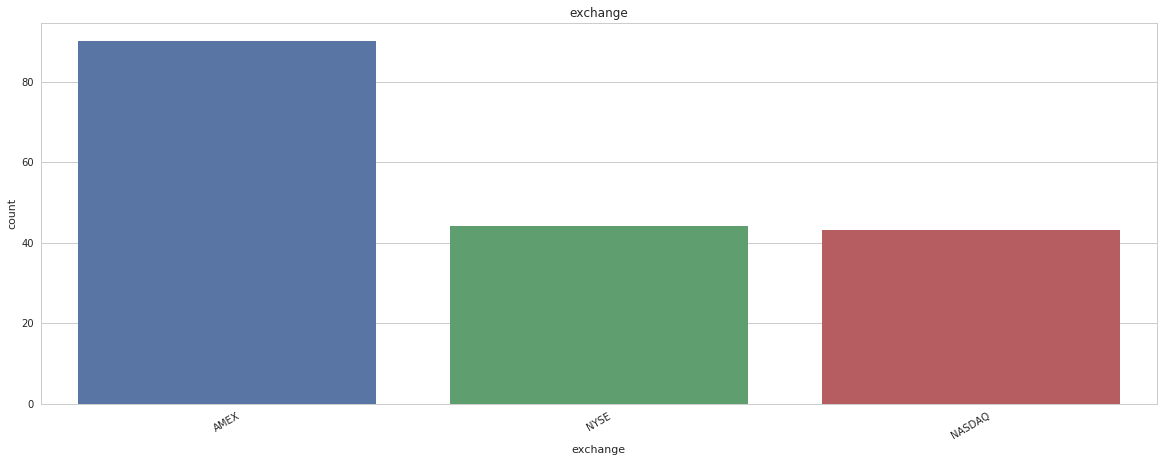

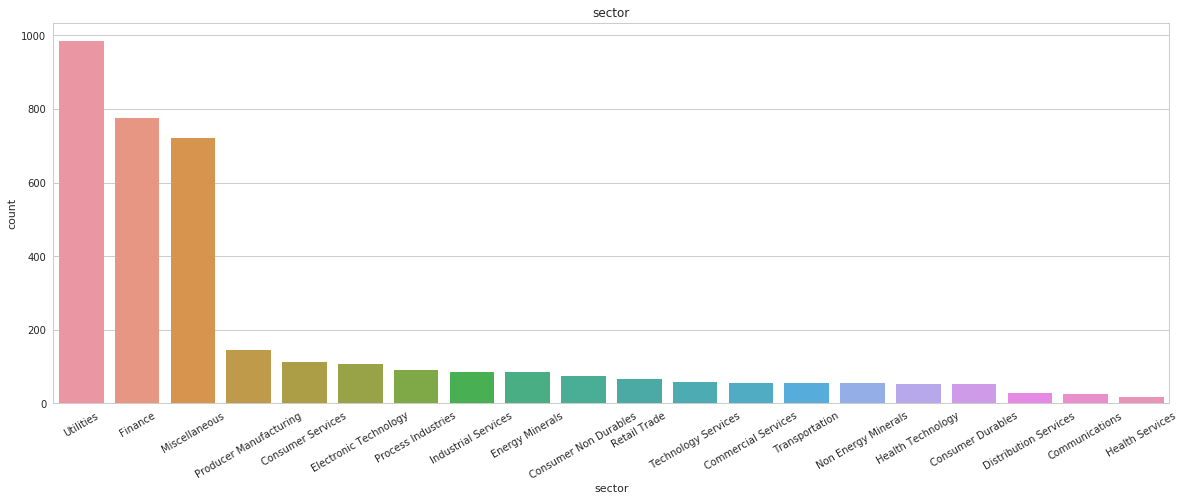

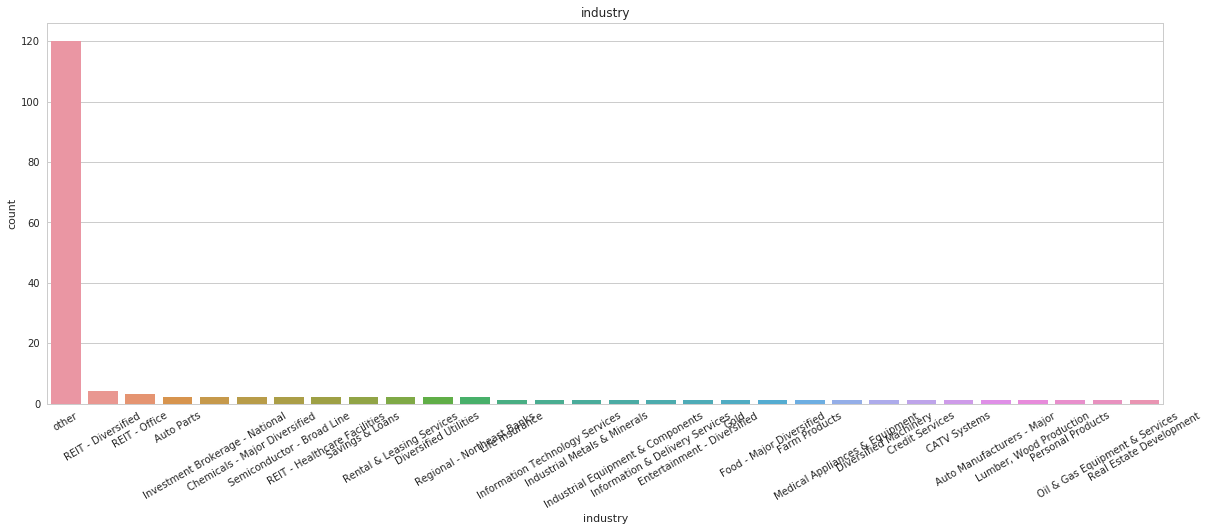

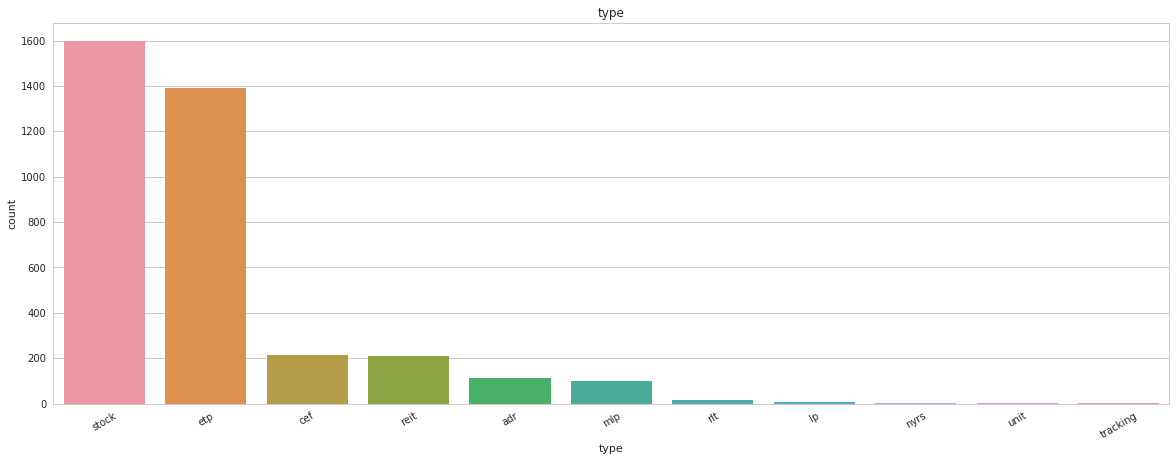

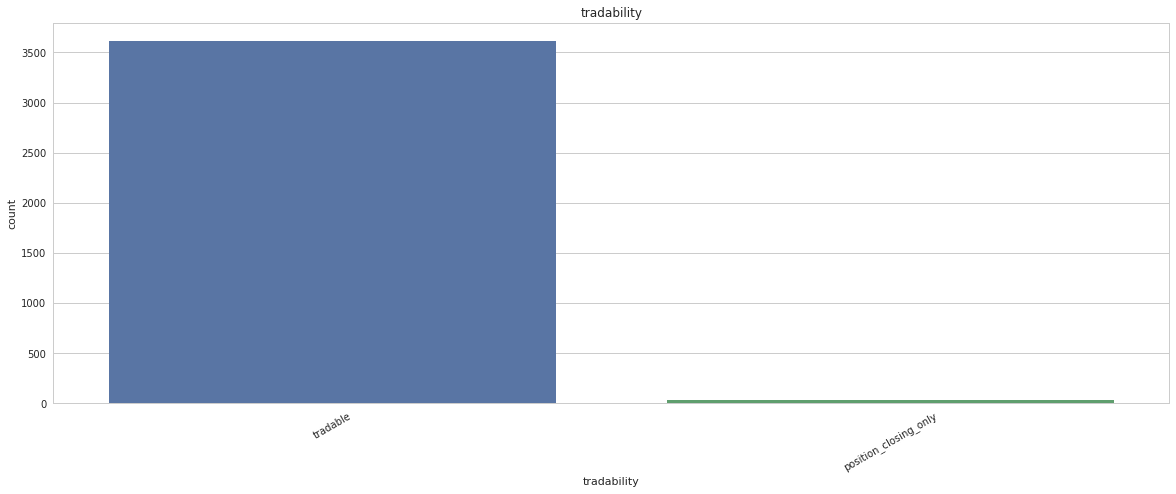

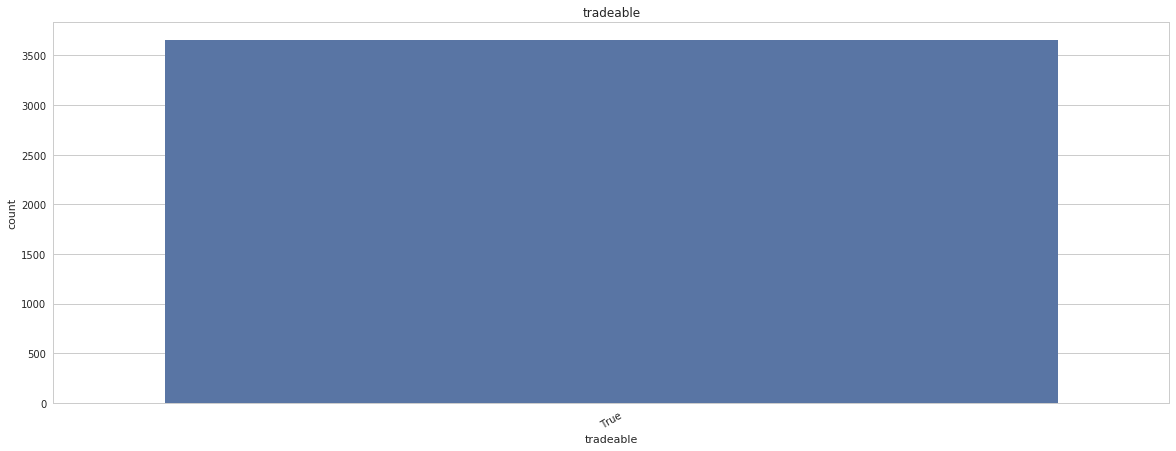

In [51]:
for a in category_cols:
    f, ax = plt.subplots(figsize=(20, 7))
    sns.countplot(x = a, data = instruments, orient='h', order = instruments[a].value_counts().iloc[:30].index)
    ax.set_title(a)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

So it turns out most of the assets are US assets, however what's interesting is that a lot of these stocks are listed in Zurich.
Also all the stocks are tradable (because I selected only tradables in the [download script](https://github.com/jonnylangefeld/dividend-data-download/blob/master/download-dividend-data.ipynb)), however some where only tradable to close a position.

Next let's look at the numeric columns:

In [53]:
numeric_cols =  list(instruments.select_dtypes(include='float').columns)
numeric_cols

['price',
 'open',
 'high',
 'low',
 'high_52_weeks',
 'low_52_weeks',
 'percent_off_52_week_high',
 'volume',
 'average_volume',
 'average_volume_2_weeks',
 'dividend_yield',
 'div_yield',
 'div_growth',
 'annual_payout',
 'payout_ratio',
 'num_employees',
 'year_founded',
 'shares_outstanding',
 'market_cap',
 'num_buy_ratings',
 'num_hold_ratings',
 'num_sell_ratings',
 'percent_buy_ratings',
 'percent_sell_ratings',
 'day_trade_ratio',
 'maintenance_ratio',
 'margin_initial_ratio',
 'pe_ratio',
 'min_tick_size']

In [54]:
instruments.loc[:, numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
price,177.0,4.320638e+01,6.005465e+01,2.4300,2.527000e+01,3.118000e+01,4.435000e+01,6.925100e+02
open,3462.0,5.107407e+01,8.692782e+01,0.1940,2.022000e+01,3.413540e+01,6.149500e+01,4.120000e+03
high,3462.0,5.138087e+01,8.711465e+01,0.1940,2.031000e+01,3.428500e+01,6.196375e+01,4.120000e+03
low,3462.0,5.067141e+01,8.520978e+01,0.1800,2.007250e+01,3.399095e+01,6.108000e+01,4.011399e+03
high_52_weeks,3584.0,5.623246e+01,9.663919e+01,0.1000,2.376250e+01,3.717500e+01,6.750750e+01,4.690000e+03
low_52_weeks,3584.0,4.145585e+01,6.869765e+01,0.0000,1.674377e+01,2.795000e+01,5.048520e+01,3.247000e+03
percent_off_52_week_high,177.0,-1.097237e+01,1.129132e+01,-87.7000,-1.212000e+01,-7.240000e+00,-5.160000e+00,0.000000e+00
volume,3651.0,3.341535e+05,1.133339e+06,0.0000,6.308500e+03,4.590700e+04,2.228380e+05,2.600649e+07
average_volume,3584.0,1.060095e+06,3.622078e+06,50.0000,2.522452e+04,1.504200e+05,7.482691e+05,8.183441e+07
average_volume_2_weeks,3583.0,1.017150e+06,3.671463e+06,0.0000,1.955765e+04,1.281830e+05,6.978832e+05,8.152807e+07


Right now it's pretty late at night and I will leave it at that for now. Feel free to fork this notebook or come up with your own data exploration. And where it get's really interesting is obviously a rating, of which stocks with the best risk/reward ratio you should buy for your dividend portfolio :)

Have fun!    
@jonnylangefeld